In [2]:
import pandas as pd
import matplotlib.pyplot as plt

delta_list = [0.5,1,2,5,10]
gamma_list =[0.1,0.25,0.5,0.75,0.9]

C:\Users\Charon\AppData\Local\Temp\ipykernel_17260\919076116.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["T"] = round(gamma_df["T"],-1)
C:\Users\Charon\AppData\Local\Temp\ipykernel_17260\919076116.py:10: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Index is deprecated. In a future version, `series[an_int] = val` will insert a new key into the Series. Use `series.iloc[an_int] = val` to treat the key as positional.
  filtered_df[0] = 0
C:\Users\Charon\AppData\Local\Temp\ipykernel_17260\919076116.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

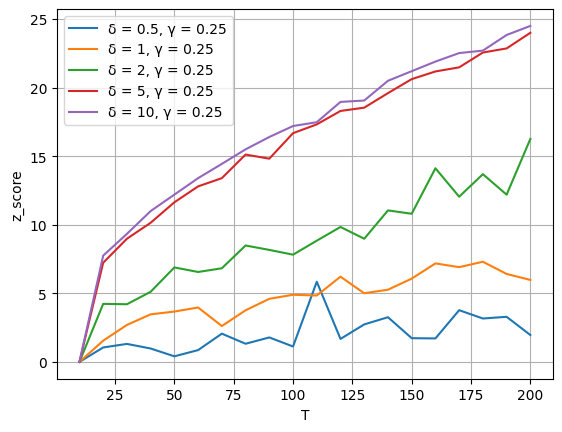

In [3]:
gamma_df = pd.read_csv('vis_fix_gamma.txt', delimiter=' ',header = None)
gamma_df.columns = ["gamma","delta",'T', 'z', 'ppl']

for i in delta_list:
    filtered_df = gamma_df[(gamma_df['delta'] == i) & (gamma_df['gamma']== 0.25)]
    filtered_df.columns = ["gamma","delta",'T', 'z', 'ppl']
    filtered_df["T"] = round(gamma_df["T"],-1)
    grouped = filtered_df.groupby("T")
    filtered_df = grouped["z"].mean()
    filtered_df[0] = 0
    result = filtered_df.sort_index()

    plt.plot(result.index, result.values, label='δ = {}, γ = {}'.format(i, 0.25))

plt.xlabel('T')
plt.ylabel('z_score')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Charon\AppData\Local\Temp\ipykernel_17260\4170181185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["T"] = round(delta_df["T"],-1)
C:\Users\Charon\AppData\Local\Temp\ipykernel_17260\4170181185.py:9: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Index is deprecated. In a future version, `series[an_int] = val` will insert a new key into the Series. Use `series.iloc[an_int] = val` to treat the key as positional.
  filtered_df[0] = 0
C:\Users\Charon\AppData\Local\Temp\ipykernel_17260\4170181185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

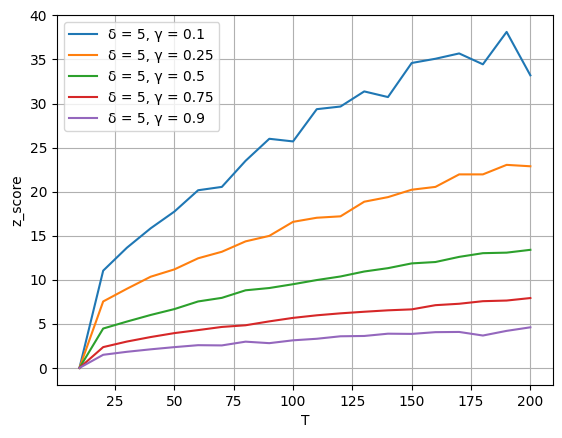

In [4]:
delta_df = pd.read_csv('vis_fix_delta.txt', delimiter=' ',header = None)
delta_df.columns = ["gamma","delta",'T', 'z', 'ppl']

for j in gamma_list:
    filtered_df = delta_df[(delta_df['delta'] == 5) & (delta_df['gamma']== j)]
    filtered_df["T"] = round(delta_df["T"],-1)
    grouped = filtered_df.groupby("T")
    filtered_df = grouped["z"].mean()
    filtered_df[0] = 0
    result = filtered_df.sort_index()

    plt.plot(result.index, result.values, label='δ = {}, γ = {}'.format(5, j))

plt.xlabel('T')
plt.ylabel('z_score')
plt.legend()
plt.grid(True)
plt.show()

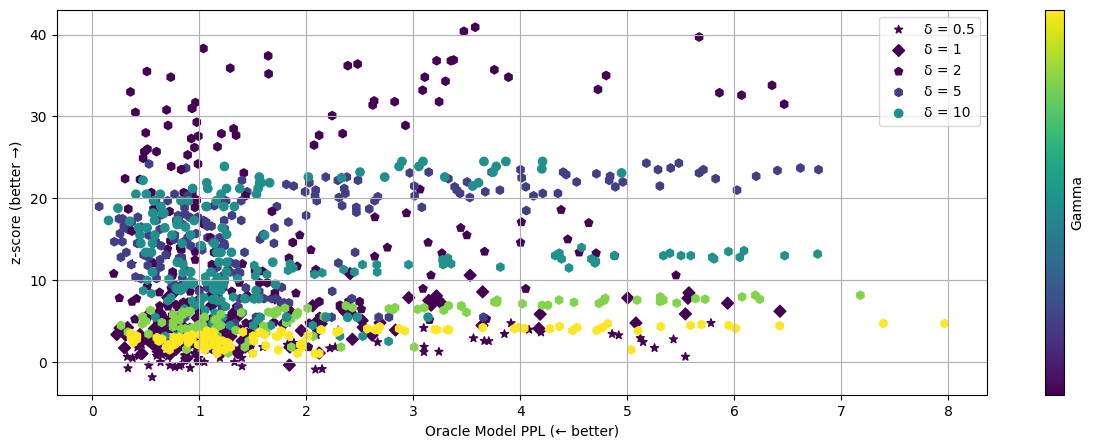

In [5]:
import numpy as np

df = pd.concat([gamma_df, delta_df], axis=0)

gamma = df.iloc[:, 0]
delta = df.iloc[:, 1]
T= df.iloc[:, 2]
z_score = df.iloc[:, 3]
ppl = df.iloc[:, 4]

fig = plt.figure(figsize=(15,5))
shape = ["*",'D', "p", 'h', 'o']

delta_list = [0.5,1,2,5,10]
gamma_list =[0.1,0.25,0.5,0.75,0.9]
for i in range(5):
    filtered_df = df[(df.iloc[:, 1] == delta_list[i])]
    x = filtered_df.iloc[:, 4]
    y = filtered_df.iloc[:, 3]
    plt.scatter(x, y, c=filtered_df.iloc[:, 0], cmap='viridis', label='δ = {}'.format(delta_list[i]),marker=shape[i])

cbar = plt.colorbar(ticks=np.linspace(0, 100, 10), label = 'Gamma')

plt.xlabel('Oracle Model PPL (← better)')
plt.ylabel('z-score (better →)')
plt.grid()
plt.legend()
plt.show()